In [1]:
# Cell 1: Import Libraries and Load Model
import cv2
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
model_path = "ei-dog-detector-transfer-learning-tensorflow-lite-float32-model.lite"  # Update this path
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


(120, 160)


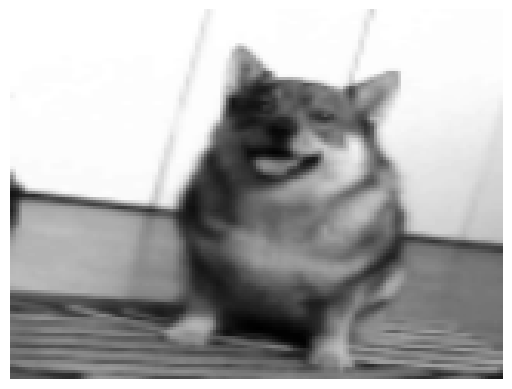

In [2]:
# Cell 2: Load and Display Image
import matplotlib.pyplot as plt  # Importing pyplot for displaying images

# Load the image
image_path = "../../module 2/Transfer learning/dog-classification-png/dog/21.png"  # Update this path
#image_path = "../../module 1/content/dataset/capacitor/17.png"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image for processing
    image_resized = cv2.resize(image_gray, (160, 120))  # Resize to input size
    #image_resized = image_gray 

    print(image_resized.shape)
    

    # Display the grayscale image
    plt.imshow(image_resized, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

In [3]:
# Cell 3: Define Sliding Window Function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

window_size = (30, 30)  # Size of the window (width, height)
step_size = 15  # How much to move the window

In [4]:
# Cell 4: Prepare for Detection
detected = False  # Flag to indicate if a dog is detected
image_resized2 = image_resized

for (x, y, window) in sliding_window(image_resized, step_size, window_size):
    # Prepare the window for inference
    input_data = cv2.resize(window, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

    # Since we are using grayscale, we need to add the channel dimension
    input_data = np.expand_dims(input_data, axis=-1)  # Add channel dimension
    input_data = np.expand_dims(input_data, axis=0).astype(np.float32)  # Reshape for model input

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prob = output_data[0][1]  # Assuming class 1 is "dog"
    print(output_data)

    # Check against threshold
    if prob >= 0.8:
        detected = True  # Set detected flag to true
        # Draw rectangle around detected object in red
        cv2.rectangle(image_resized2, (x, y), (x + window_size[0], y + window_size[1]), (0, 0, 255), 1)  # Red color (BGR) with line thickness set to 1
        
        # Display probability on top of the rectangle with smaller text
        prob_text = f"{prob:.2f}"  # Format probability to two decimal places
        cv2.putText(image_resized2, prob_text, (x + 2, y + 12), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)  # Font scale set to 0.3 and thickness set to 1, with red color

# Print detection result
if detected:
    print("Dog detected!")
else:
    print("No dog detected.")

[[0.9874029  0.01259708]]
[[0.9799191  0.02008089]]
[[0.9800309  0.01996907]]
[[0.9785903  0.02140975]]
[[0.94545305 0.05454688]]
[[0.11564962 0.88435036]]
[[0.05457053 0.94542944]]
[[0.01120235 0.9887976 ]]
[[0.21356559 0.7864344 ]]
[[0.97072774 0.02927219]]
[[0.97658676 0.02341321]]
[[0.9817861  0.01821395]]
[[0.912078   0.08792193]]
[[0.8103736  0.18962647]]
[[0.00571682 0.99428314]]
[[0.00239309 0.9976069 ]]
[[0.07549637 0.9245037 ]]
[[0.8593369  0.14066312]]
[[0.952962   0.04703806]]
[[0.9694067  0.03059326]]
[[0.9701037  0.02989634]]
[[0.95740944 0.04259056]]
[[0.009877 0.990123]]
[[1.18309224e-04 9.99881625e-01]]
[[0.00698274 0.9930173 ]]
[[0.02600166 0.9739983 ]]
[[0.6394467  0.36055338]]
[[0.9813663  0.01863369]]
[[0.9974727  0.00252722]]
[[0.83865726 0.16134277]]
[[0.97905606 0.0209439 ]]
[[0.87060803 0.129392  ]]
[[0.9475418  0.05245826]]
[[0.9067848  0.09321521]]
[[0.17173572 0.8282643 ]]
[[0.5948644  0.40513554]]
[[0.9984699 0.0015301]]
[[0.99553055 0.0044695 ]]
[[9.995509

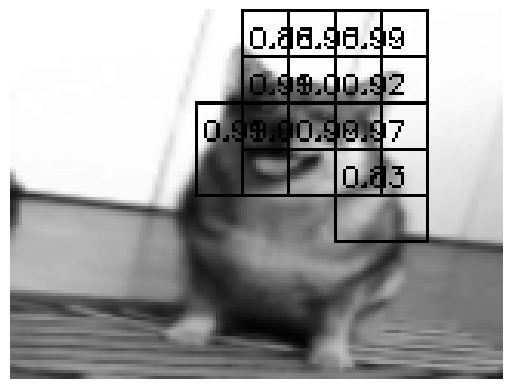

In [5]:
# Cell 5: Display the Output Image
plt.imshow(cv2.cvtColor(image_resized2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')  # Hide axis
plt.show()